# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [ ]:
np.random.seed(1)

### Funciones

In [ ]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

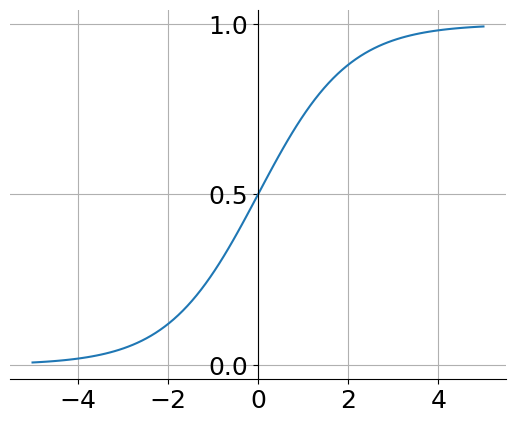

In [ ]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

In [ ]:
training_inputs = np.array([
    [1,1,0,0,1],   #mujer bonita
    [0,0,1,1,0],   #avengers
    [0,0,1,1,0],   #romeo debe morir
    [1,1,1,1,0],   #sr y sra smith
    [1,1,0,0,0],   #orgullo y prejuicio
    [1,0,0,1,1],   #son como niños
    [1,0,1,1,1]    #top secret
])

training_outputs = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [1, 1, 0]
])

display(training_inputs)
display(training_outputs)

array([[1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1]])

array([[1, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0]])

In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

1,1,0,0,1,1,0,1
0,0,1,1,0,0,1,0
0,0,1,1,0,0,1,1
1,1,1,1,0,1,1,1
1,1,0,0,0,0,0,1
1,0,0,1,1,1,0,0
1,0,1,1,1,1,1,0


#### Synaptic weights

In [ ]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((5, 3)) - 1

synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437],
       [1.30233257, 1.14675589, 1.09233859],
       [1.18626021, 1.34556073, 1.39676747],
       [1.53881673, 1.41919451, 1.6852195 ],
       [1.20445225, 1.87811744, 1.02738759]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 1.54875305 -4.24037904 -2.00707632]
 [-1.18372577 -1.69023201 10.7262795 ]
 [-0.82646468 10.90708343  1.27091329]
 [ 0.09665102  1.27175612 -1.27110697]
 [ 5.61447334 -2.43670897 -3.31879733]]
Outputs after training: 
[[9.97476272e-01 2.32286587e-04 9.95505498e-01]
 [3.25235620e-01 9.99994862e-01 4.99951577e-01]
 [3.25235620e-01 9.99994862e-01 4.99951577e-01]
 [4.09801414e-01 9.98069836e-01 9.99836575e-01]
 [5.90256850e-01 2.64984465e-03 9.99836607e-01]
 [9.99297292e-01 4.47251518e-03 1.36263737e-03]
 [9.98395603e-01 9.95936915e-01 4.83967016e-03]]


## Eval

In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
import numpy as np

#synaptic_weights = np.random.uniform(size=(5, 3))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = 1 #@param {type:"integer"}
b = 0 #@param {type:"integer"}
c = 0 #@param {type:"integer"}
d = 1 #@param {type:"integer"}
e = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e])
res = sigmoid(np.dot(input_layer, synaptic_weights))

thresh = 0.5
out = (res >= thresh).astype(int)

display(res)
large(out)

array([0.9992973 , 0.00447247, 0.00136262])

### Graph

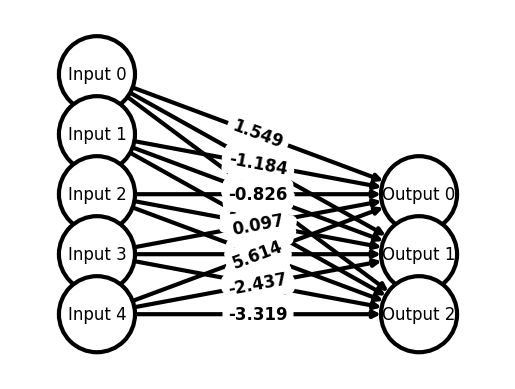

In [ ]:
# Define the number of inputs and outputs
num_inputs = 5
num_outputs = 3

# Create a directed graph
G = nx.DiGraph()

# Define the layers for the neural network
layers = [[i for i in range(num_inputs)], [o for o in range(num_inputs, num_inputs + num_outputs)]]

# Generate all possible connections between layers
rels = list(itertools.product(*layers))

# Define node labels for inputs and outputs
input_labels = [f"Input {i}" for i in range(num_inputs)]
output_labels = [f"Output {o - num_inputs}" for o in range(num_inputs, num_inputs + num_outputs)]
labels = {i: input_labels[i] for i in range(num_inputs)}
labels.update({o: output_labels[o - num_inputs] for o in range(num_inputs, num_inputs + num_outputs)})

# Define positions for nodes in the graph
pos = {}
for i, l in enumerate(layers):
    for j, v in enumerate(l):
        pos[v] = (i, len(l) - j - 1)

# Define edge weights (you'll need to replace this with your actual synaptic weights)

#weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][j]) for i, (ra, rb) in enumerate(rels) for j in range(num_outputs)}

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[ra][rb - num_inputs]) for ra, rb in rels}

# Add edges to the graph
G.add_edges_from(rels)

# Define visualization options
options = {
    "font_size": 12,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

# Draw the graph
nx.draw_networkx(G, pos, **options)

# Draw edge labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=12,
    font_weight='bold'
)

# Display the graph
plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()


# **Bonus**

**A. ¿Como modificarían la estructura de la red para que admita *k* capas ocultas con *n* neuronas cada una? Describir como sería el algoritmo de forward propagation en este caso, no es necesario implementar el algoritmo de back propagation.**

La modificación de la estructura de la red comenzaría encontrando los nuevos pesos de cada entrada y el sesgo. Luego, este nuevo algoritmo de forward propagation causaría que se calculen de nuevo todos los valores de las capas sumando el producto de los valores de entrada, los pesos y añadiendo el sesgo. Luego, se les aplica la función de activación (como sucede en los procesos de forward propagation) y la salida de una capa se convierte en la entrada para la siguiente capa.


**B. Investigar la función de activación Softmax y explicar como se puede utilizar para resolver un problema de clasificación con *m* clases mutualmente excluyentes. ¿Que habría que modificar en el código para utilizar esta función de activación?**

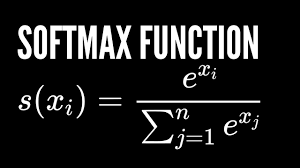

Es una función de activación en la capa de salida para problemas de clasificación multiclase. Toma un conjunto de valores, logits, que representan puntajes para diferentes clases, y los convierte en probabilidades. Un código que ejemplifica como se puede usar (con las propiedades de un modelo secuencial ya construido) sería:

```
import tensorflow as tf

# modelo secuencial
model = tf.keras.Sequential([
    # las capas ocultas
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila modelo con loss adecuado
model.compile(loss='categorical_crossentropy')

# entrena el modelo con los datos de entrenamiento
model.fit(train_data, train_labels, epochs=20)

# hace las predicciones
predicciones = model.predict(nueva_data)
```


---


Para usar Softmax en el código actual, habría que crear una nueva función dentro del programa. Por ejemplo:


```
import numpy as np

def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()
```
Esta función toma un vector y usa "exp" de la librería numpy para calcular "e" (Euler, aproximadamente 2.718) elevado a "x" (cada número del vector).